<a href="https://colab.research.google.com/github/RomanKunal/Machine-Learning/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('/content/loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(480, 13)

In [9]:
# label encoding
data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-9-5324a46e2975>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [13]:
#replacing the value of 3+ to 4
data=data.replace(to_replace='3+',value=4)

In [15]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [16]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Education', ylabel='count'>

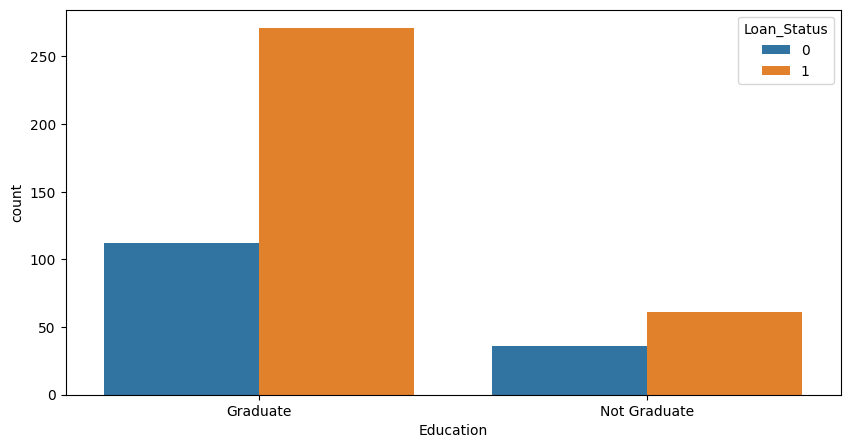

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

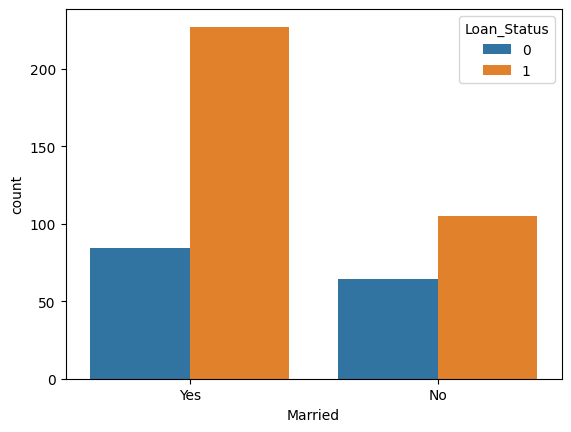

In [18]:
# martial status
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [19]:
#convert categorical part to numerical form
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}},inplace=True)


<ipython-input-19-d7722d1f783e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}},inplace=True)


In [20]:
data.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


<ipython-input-20-d3a571654fd4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
# seprating dataset
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
model=SVC(kernel='linear')

In [25]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [26]:
# model evaluation
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.8072916666666666


In [27]:
#test data acuracy
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.7083333333333334


In [29]:
# predict the output
input=[1,1,0,0,0,2583,2358,120,360,1,2]
input_as_numpy_array=np.asarray(input)
input_reshaped=input_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_reshaped)
print(prediction)
if(prediction[0]==0):
  print('loan is not approved')
else:
  print('loan is approved')

[1]
loan is approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
